<a href="https://colab.research.google.com/github/yumeniown/Flight-Delays-competition/blob/main/final_attestation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Итоговая аттестация
### 2. Соревнование “Flight Delays”
Целью этого задания является участие в соревновании на
платформе Kaggle, посвященном предсказанию задержек
рейсов. Вам предстоит проанализировать предоставленные
данные, построить модели машинного обучения и улучшить их
с целью достижения точности предсказаний выше 0.7
(метрика AUC-ROC).
https://www.kaggle.com/competitions/flight-delays-fall-2018/overview
Этапы выполнения задания:
1. Регистрация на Kaggle: Если у вас еще нет аккаунта,
зарегистрируйтесь на платформе Kaggle.
2. Изучение данных: Перейдите на страницу соревнования по
ссылке, загрузите и изучите данные. Поймите структуру
данных, какие признаки могут влиять на задержку рейсов.
3. Предобработка данных: Проведите предобработку данных:
очистите их от пропусков, выполните кодирование
категориальных признаков, масштабирование данных и другие
необходимые шаги.
4. Построение модели: Разработайте несколько моделей
машинного обучения, используя библиотеки Python
(например, scikit-learn, XGBoost, CatBoost). Оцените
качество каждой модели, используя перекрестную проверку и
метрику AUC-ROC.
5. Оптимизация модели: Настройте гиперпараметры модели с
использованием методов GridSearchCV или
RandomizedSearchCV, чтобы достичь лучших результатов.
6. Сабмит предсказаний(доп): Создайте файл с
предсказаниями на тестовой выборке и загрузите его на
платформу Kaggle. Ваша цель — достичь метрики AUC-ROC
выше 0.
7. Документация: Оформите результаты вашего анализа,
предобработки данных, построения и оптимизации модели в
Jupyter Notebook. Подготовьте отчет с визуализациями и
комментариями.


### **1. Изучение данных: Перейдите на страницу соревнования по ссылке, загрузите и изучите данные. Поймите структуру данных, какие признаки могут влиять на задержку рейсов.**

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
train_data = pd.read_csv("flight_delays_train.csv")
test_data = pd.read_csv("flight_delays_test.csv")

In [ ]:
train_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [ ]:
test_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 non-null  object
 3   DepTime        100000 non-null  int64 
 4   UniqueCarrier  100000 non-null  object
 5   Origin         100000 non-null  object
 6   Dest           100000 non-null  object
 7   Distance       100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


Изучим данные для выявления признаков, способствующих задержке рейсовё

In [ ]:
train_data.isnull().sum()

,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
UniqueCarrier,0
Origin,0
Dest,0
Distance,0
dep_delayed_15min,0


Из результата видно, что набор данных является полным, не имея пропущенных значений

<ipython-input-13-81fba7ccc0c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='dep_delayed_15min', palette='Set1')


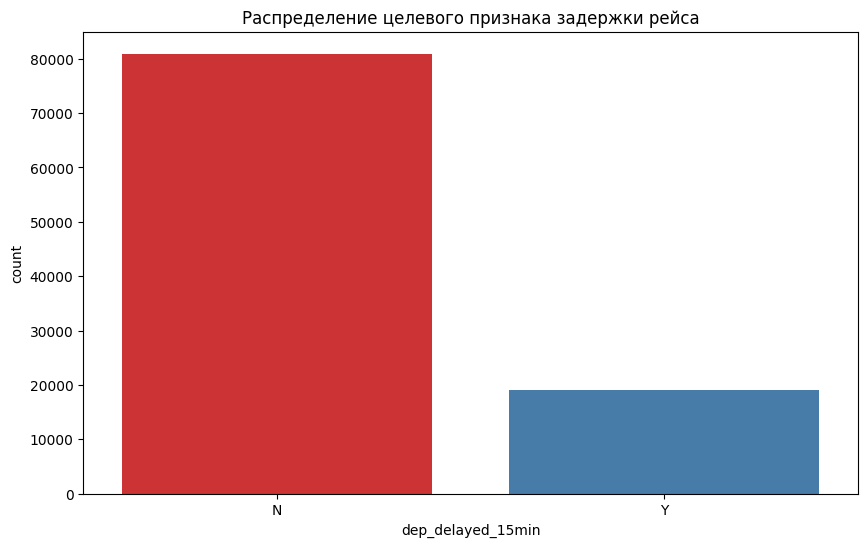

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='dep_delayed_15min', palette='Set1')
plt.title("Распределение целевого признака задержки рейса")
plt.show()

In [ ]:
train_data.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


Первая существенная разница между значениями проявляется в среднем времени вылета которое равно 1341 мин, а стандартное отклонение равняется 476 мин, -это указывает на большие нестабильности, или же, колебания, во времени вылета. Минимальное и максимальное значения между аэропортами равняются от 30 км до 4962 км о средним значением полета в 729 км



In [ ]:
# изучим категориальные признаки
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nРаспределение {col}:\n", train_data[col].value_counts())


Распределение Month:
 Month
c-8     8830
c-7     8706
c-3     8595
c-5     8543
c-6     8414
c-4     8408
c-10    8405
c-12    8265
c-11    8178
c-9     8163
c-1     8075
c-2     7418
Name: count, dtype: int64

Распределение DayofMonth:
 DayofMonth
c-1     3399
c-20    3380
c-6     3377
c-22    3374
c-14    3366
c-17    3347
c-10    3342
c-27    3330
c-28    3321
c-5     3321
c-25    3314
c-23    3314
c-21    3312
c-19    3305
c-15    3297
c-2     3285
c-9     3283
c-7     3272
c-8     3258
c-4     3249
c-18    3246
c-26    3241
c-16    3240
c-13    3238
c-3     3228
c-12    3212
c-24    3210
c-11    3168
c-30    2976
c-29    2837
c-31    1958
Name: count, dtype: int64

Распределение DayOfWeek:
 DayOfWeek
c-4    14736
c-5    14657
c-2    14604
c-1    14569
c-3    14508
c-7    14097
c-6    12829
Name: count, dtype: int64

Распределение UniqueCarrier:
 UniqueCarrier
WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO

Категориальные признаки, выведенные выше, могут значительно влиять на задержки рейсов, так как определенные авиакомпании и аэропорты могут демонстрировать более высокие или низкие уровни задержек, также и месяц, день месяца и день недели влияют на активность полетов, как и нагрузка на определенные аэропорты


### **3. Предобработка данных: Проведите предобработку данных: очистите их от пропусков, выполните кодирование категориальных признаков, масштабирование данных и другие необходимые шаги.**

Очистка от пропусков, если они есть

In [ ]:
if train_data.isnull().sum().sum() > 0:
    train_data.fillna(method='ffill', inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# кодирование целевого признака
train_data['dep_delayed_15min'] = train_data['dep_delayed_15min'].map({'Y': 1, 'N': 0})
print("Проверка целевого признака после кодирования:")
print(train_data['dep_delayed_15min'].unique())

# кодирование категориальных данных
encoder = LabelEncoder()
for col in categorical_cols:
    if col != 'dep_delayed_15min':
        train_data[col] = encoder.fit_transform(train_data[col])

# разделим на X и y
X = train_data.drop(columns=['dep_delayed_15min'])
y = train_data['dep_delayed_15min']

# масштабирование числовых данных
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# проверим данных
print("\nПроверка данных перед обучением:")
print("Уникальные значения целевого признака (y):", y.unique())

Проверка целевого признака после кодирования:
[0 1]

Проверка данных перед обучением:
Уникальные значения целевого признака (y): [0 1]


Из результата выходит, что целевой признак теперь имеет два возможных значения: 0, без задержки, и 1, с задержкой, а также, перед обучением данные были разделены на признаки X и целевую переменную y, и проверка уникальных значений в y подтверждает, что целевой признак имеет корректное распределение с двумя категориями, из чего следует, что данные готовы для дальнейшего обучения модели

### **4. Построение модели: Разработайте несколько моделей машинного обучения, используя библиотеки Python (например, scikit-learn, XGBoost, CatBoost). Оцените качество каждой модели, используя перекрестную проверку и метрику AUC-ROC.**

Разделение на обучающую и тестовую выборки

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Разработаем модели и оценим качество каждой

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

model_results = {}

print("\nОценка моделей с перекрестной проверкой:")
for model_name, model in models.items():
    auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    print(f"{model_name} AUC-ROC: {auc_scores.mean():.4f}")
    model_results[model_name] = auc_scores.mean()


Оценка моделей с перекрестной проверкой:
Random Forest AUC-ROC: 0.7294


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:21:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:21:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:21:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:21:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:21:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost AUC-ROC: 0.7404
CatBoost AUC-ROC: 0.7438


По результатам выходит, что CatBoost имеет лучший показатель AUC-ROC, равный ~0.74, а остальные результаты приблизительно близки, опять же, при наиболее тщательной предобработке, данные были бы, очевидно лучше для каждый каждой из моделей

### **5. Оптимизация модели: Настройте гиперпараметры модели с использованием методов GridSearchCV или RandomizedSearchCV, чтобы достичь лучших результатов.**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf_params = {
    "n_estimators": [100, 150],
    "max_depth": [10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt'],
    "bootstrap": [True]
}

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    rf_params,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_
best_rf_auc = roc_auc_score(y_valid, best_rf.predict(X_valid))
print("\Random Forest AUC-ROC:", best_rf_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


\Random Forest AUC-ROC: 0.6493378653442928


 RandomizedSearchCV показывает результаты не выше 0.7, но довольно близкие к этому значению, однако, если увеличить параметры для более тщательной оптимизации, можно и более 30 минут, чего не особо хочется, прождав итак в районе 10.

7. Общая визуализации

<ipython-input-21-ff98cfc78a14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')


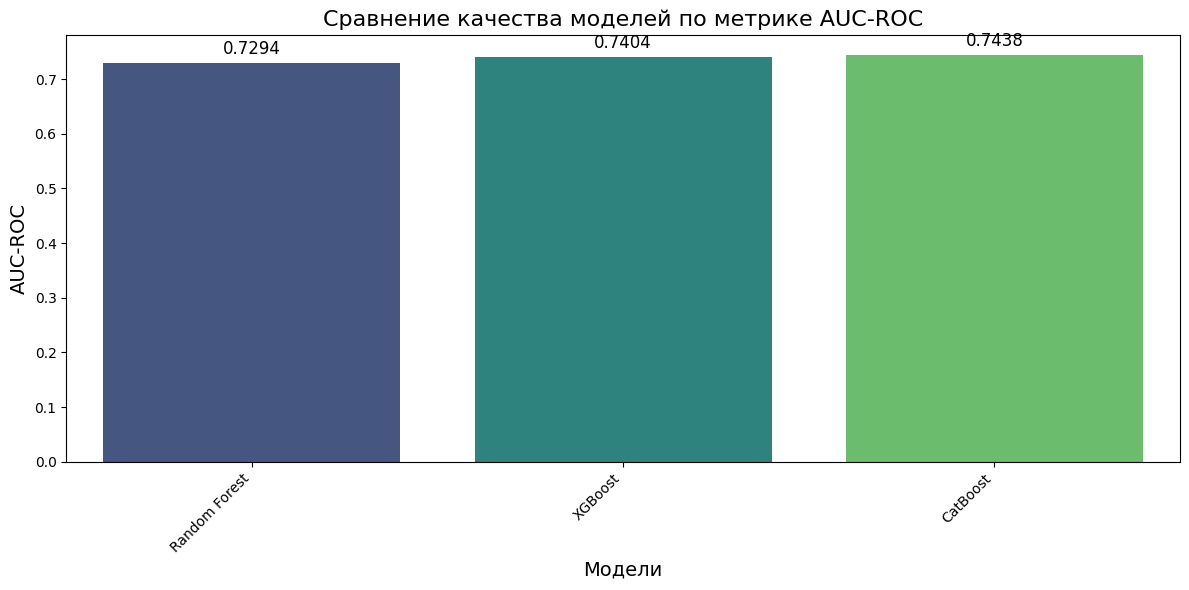

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')

plt.title("Сравнение качества моделей по метрике AUC-ROC", fontsize=16)
plt.xlabel("Модели", fontsize=14)
plt.ylabel("AUC-ROC", fontsize=14)

for i, value in enumerate(model_results.values()):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

По графику можно  сравнить качество моделей по метрике AUC-ROC для быстрого выявления наиболее эффективной модели






